<a href="https://colab.research.google.com/github/SarahSouzaPontes/arvoreDeDecis-o/blob/main/Arv_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## **Importação dos Dados de Custos Médicos**


import pandas as pd
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
dados = pd.read_csv(url)
dados.head()
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


#ÁRVORE DE DECISÃO
#####n de folhas;
#####profundidade da arvore (altura)
#####como se escolhe as variaveis dos nós -> entropia.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
import numpy as np

profundidade = 3

R = 100
eqms_treino = []
eqms_teste = []

X = dados[['bmi']]
y = dados['charges']

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

    arvore = DecisionTreeRegressor(max_depth = profundidade)
    arvore.fit(Xtreino, ytreino) 

    preditos_treino = arvore.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)
    eqms_treino.append(eqm_treino)

    preditos_teste = arvore.predict(Xteste)
    eqm_teste = mean_squared_error(preditos_teste, yteste)
    eqms_teste.append(eqm_teste)
 
print('O Erro Quadrático Médio de TREINO foi: {:.2f}'.format(np.mean(eqms_treino)))
print('O Erro Quadrático Médio de TESTE  foi:  {:.2f}'.format(np.mean(eqms_teste)))


O Erro Quadrático Médio de TREINO foi: 136.33
O Erro Quadrático Médio de TESTE  foi:  145.66


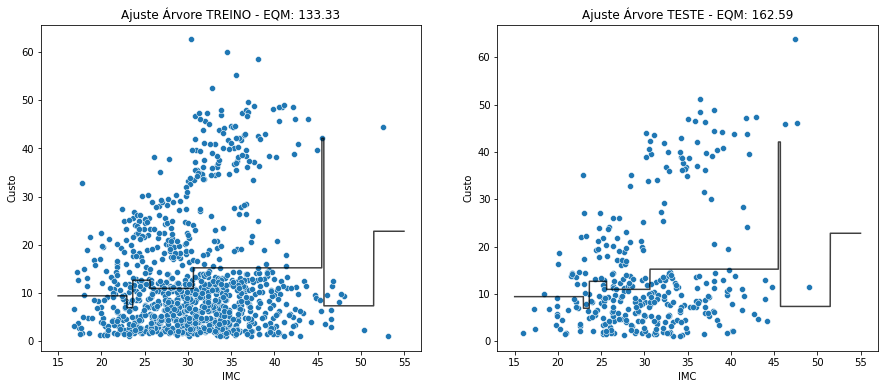

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

X = dados[['bmi']]
y = dados['charges']
import matplotlib.pyplot as plt
import seaborn as sns

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np

x = np.arange(15, 55, 0.01)
y = arvore.predict(pd.DataFrame({'bmi': x}))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()

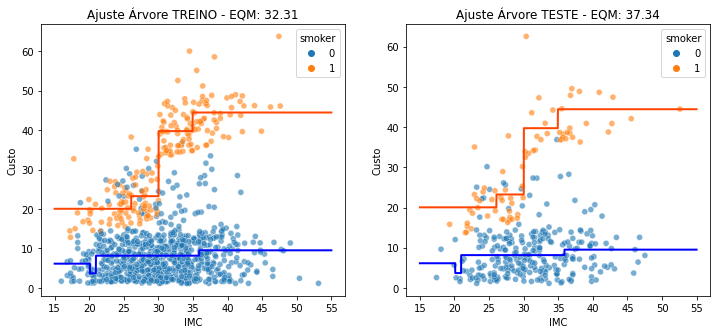

In [ ]:
 ####2 Variáveis
X = dados[['bmi', 'smoker']]
y = dados['charges'] 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np
 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = arvore.predict(c0)
d1 = arvore.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

#erro quadratico medio



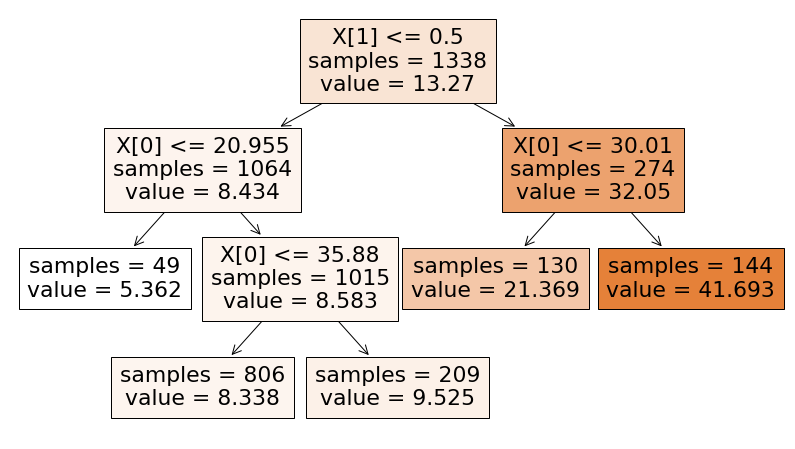

In [ ]:
# Gráfico da Árvore

from sklearn.tree import plot_tree

X = dados[['bmi', 'smoker']]
y = dados['charges']

arvore = DecisionTreeRegressor(max_depth = 3, min_samples_split = 150) #num min de amostras reduz overfitting
arvore.fit(X, y)

plt.figure(figsize = (14, 8))
plot_tree(arvore, filled=True, proportion = False, impurity = False)
plt.show()

## **Comparação dos Modelos**

In [ ]:
def HoldoutRepetido(modelo, replicas = 100, proporcao = 0.25): 

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
        
        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino) 
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)
    
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}\n'.format(res_teste))

    return res_treino, res_teste 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

HoldoutRepetido(modelo = KNeighborsRegressor())

EQM médio de TREINO: 31.37
EQM médio de TESTE: 47.36



(31.37, 47.36)

In [ ]:
HoldoutRepetido(KNeighborsRegressor(n_neighbors = 20))

EQM médio de TREINO: 48.72
EQM médio de TESTE: 53.92



(48.72, 53.92)

In [ ]:
HoldoutRepetido(DecisionTreeRegressor())

EQM médio de TREINO: 15.28
EQM médio de TESTE: 58.85



(15.28, 58.85)

In [ ]:
from sklearn.linear_model import LinearRegression

X = dados[['bmi', 'smoker']]
y = dados['charges']

modelos = [LinearRegression(), 
           KNeighborsRegressor(n_neighbors = 5), 
           KNeighborsRegressor(n_neighbors = 15),
           KNeighborsRegressor(n_neighbors = 25),
           KNeighborsRegressor(n_neighbors = 35),
           KNeighborsRegressor(n_neighbors = 45),
           DecisionTreeRegressor(max_depth = 1),
           DecisionTreeRegressor(max_depth = 2),
           DecisionTreeRegressor(max_depth = 3),
           DecisionTreeRegressor(max_depth = 4),
           DecisionTreeRegressor(max_depth = 5)]

nomes = ['Regressão Linear',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Árvore - Prof = 1',
         'Árvore - Prof = 2',
         'Árvore - Prof = 3',
         'Árvore - Prof = 4',
         'Árvore - Prof = 5']

treinos = []
testes = []


for modelo in modelos:
    resultados = HoldoutRepetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])

aux = {'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'EQM Teste')




EQM médio de TREINO: 50.03
EQM médio de TESTE: 50.66

EQM médio de TREINO: 31.57
EQM médio de TESTE: 46.12

EQM médio de TREINO: 43.93
EQM médio de TESTE: 51.3

EQM médio de TREINO: 54.29
EQM médio de TESTE: 58.98

EQM médio de TREINO: 67.88
EQM médio de TESTE: 71.03

EQM médio de TREINO: 80.35
EQM médio de TESTE: 85.39

EQM médio de TREINO: 55.63
EQM médio de TESTE: 56.16

EQM médio de TREINO: 34.24
EQM médio de TESTE: 35.04

EQM médio de TREINO: 33.06
EQM médio de TESTE: 34.95

EQM médio de TREINO: 32.39
EQM médio de TESTE: 35.51

EQM médio de TREINO: 30.81
EQM médio de TESTE: 37.81



,EQM Treino,EQM Teste
Árvore - Prof = 3,33.06,34.95
Árvore - Prof = 2,34.24,35.04
Árvore - Prof = 4,32.39,35.51
Árvore - Prof = 5,30.81,37.81
KNN - K = 5,31.57,46.12
Regressão Linear,50.03,50.66
KNN - K = 15,43.93,51.30
Árvore - Prof = 1,55.63,56.16
KNN - K = 25,54.29,58.98
KNN - K = 35,67.88,71.03
